In [10]:
import pandas as pd

path=r'D:\WORKSPACE\OFIICE_WORKS\model\src\saver\thetas_combined.csv'


data=pd.read_csv(path)

print(data.head())

   Openness  Conscientiousness  Extraversion  Agreeableness  Neuroticism
0 -0.246167          -0.062668     -0.120977      -0.027482     0.115858
1 -0.515862           0.088507      0.197458      -0.344494     0.211334
2 -0.053402           0.202248     -0.471009      -0.649118     0.133886
3  0.102197           0.537538     -0.178925      -0.686309     0.185773
4  0.589575          -0.068297      0.178695      -0.226650    -0.093253


In [11]:
likerata_df=pd.read_parquet(r'D:\WORKSPACE\OFIICE_WORKS\model\src\saver\likert_data.parquet')
likerata_df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0


In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
X_scaled=StandardScaler()
X_scaled=X_scaled.fit_transform(data)

In [45]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
data["cluster"] = kmeans.fit_predict(X_scaled)

In [46]:
data.head()

,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,cluster
0,-0.246167,-0.062668,-0.120977,-0.027482,0.115858,4
1,-0.515862,0.088507,0.197458,-0.344494,0.211334,3
2,-0.053402,0.202248,-0.471009,-0.649118,0.133886,4
3,0.102197,0.537538,-0.178925,-0.686309,0.185773,4
4,0.589575,-0.068297,0.178695,-0.226650,-0.093253,4


In [3]:
import pandas as pd

# Example: assuming you already have 'data' (150,000 rows)
# Compute all stats efficiently:
summary = pd.DataFrame({
    'min': data.min(),
    'max': data.max(),
    'mean': data.mean(),
    'std': data.std(),
    'range': data.max() - data.min()
}).T  # transpose so rows = stats, columns = features

summary


,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism
min,-1.929073,-2.171724,-1.981243,-1.827443,-1.841309
max,2.086098,2.275210,1.886057,2.116379,1.984153
mean,0.093028,0.208005,-0.211355,0.153797,0.125208
std,0.404052,0.377679,0.344916,0.459921,0.369400
range,4.015171,4.446934,3.867300,3.943822,3.825462


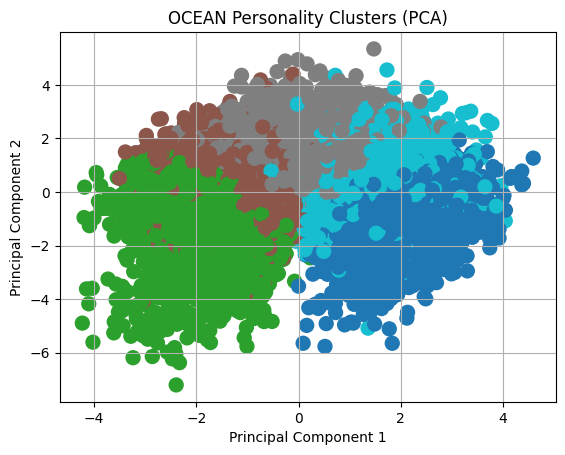

In [74]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data["cluster_gmm"], cmap="tab10", s=100)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("OCEAN Personality Clusters (PCA)")
plt.grid(True)
plt.show()


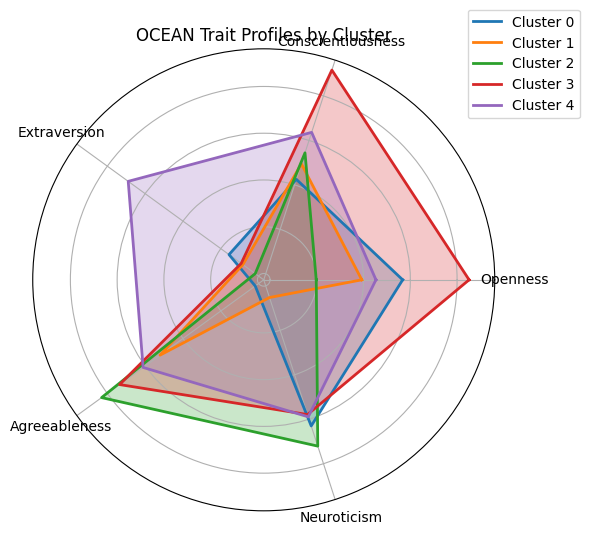

(       Openness  Conscientiousness  Extraversion  Agreeableness  Neuroticism  \
 0     -0.246167          -0.062668     -0.120977      -0.027482     0.115858   
 1     -0.515862           0.088507      0.197458      -0.344494     0.211334   
 2     -0.053402           0.202248     -0.471009      -0.649118     0.133886   
 3      0.102197           0.537538     -0.178925      -0.686309     0.185773   
 4      0.589575          -0.068297      0.178695      -0.226650    -0.093253   
 ...         ...                ...           ...            ...          ...   
 99995  0.172911           0.302738     -0.502483       0.320093     0.015056   
 99996 -0.083088           0.542187      0.030772       0.513830    -0.456013   
 99997  0.123021          -0.018950      0.470746       0.155940     0.700183   
 99998 -0.028328           0.701800     -0.255757       0.086451     0.089705   
 99999  0.531200           0.567922     -0.564401      -0.175258     0.253375   
 
        cluster          c

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate mean trait values for each cluster
cluster_means = data.groupby("cluster_gmm")[["Openness", "Conscientiousness", "Extraversion", "Agreeableness", "Neuroticism"]].mean()

# Define radar plot setup
traits = cluster_means.columns.tolist()
num_traits = len(traits)

angles = np.linspace(0, 2 * np.pi, num_traits, endpoint=False).tolist()
angles += angles[:1]  # complete the loop

# Plot radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for idx, (cluster_id, row) in enumerate(cluster_means.iterrows()):
    values = row.tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, label=f"Cluster {cluster_id}")
    ax.fill(angles, values, alpha=0.25)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(traits)
plt.title("OCEAN Trait Profiles by Cluster")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()

# Assign semantic labels (based on relative means)
semantic_labels = {}
for cluster_id, row in cluster_means.iterrows():
    if row["Conscientiousness"] > 0 and row["Neuroticism"] > 0:
        semantic_labels[cluster_id] = "Organized & Sensitive"
    elif row["Agreeableness"] < -0.3:
        semantic_labels[cluster_id] = "Reserved & Analytical"
    else:
        semantic_labels[cluster_id] = "Balanced Type"

data["cluster_label"] = data["cluster"].map(semantic_labels)
data, cluster_means


In [71]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=5, random_state=42)
data["cluster_gmm"] = gmm.fit_predict(X_scaled)


In [72]:
data.head()

,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,cluster,cluster_label,cluster_gmm
0,-0.246167,-0.062668,-0.120977,-0.027482,0.115858,4,Organized & Sensitive,0
1,-0.515862,0.088507,0.197458,-0.344494,0.211334,3,Organized & Sensitive,4
2,-0.053402,0.202248,-0.471009,-0.649118,0.133886,4,Organized & Sensitive,0
3,0.102197,0.537538,-0.178925,-0.686309,0.185773,4,Organized & Sensitive,0
4,0.589575,-0.068297,0.178695,-0.226650,-0.093253,4,Organized & Sensitive,0


In [78]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

ch = calinski_harabasz_score(X_scaled, data["cluster_gmm"])
db = davies_bouldin_score(X_scaled, data["cluster_gmm"])

print(f"Calinski-Harabasz: {ch:.2f}")
print(f"Davies-Bouldin: {db:.3f}")


Calinski-Harabasz: 21342.02
Davies-Bouldin: 1.559


In [6]:
import json

with open(r'D:\WORKSPACE\OFIICE_WORKS\model\src\lexicon.json', "r", encoding="utf-8") as file:
    data = json.load(file)

# print(json.dumps(data, indent=4))
print(data.keys())


dict_keys(['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism'])


In [8]:
import json
from sentence_transformers import SentenceTransformer, util
import pandas as pd

# Load the base lexicon
base_lexicon = data

model = SentenceTransformer('all-MiniLM-L6-v2')

def expand_trait(trait, seed_words, vocab, top_k=300, similarity_threshold=0.6):
    # embed seeds
    seed_emb = model.encode(seed_words, convert_to_tensor=True)
    # embed vocab
    vocab_emb = model.encode(vocab, convert_to_tensor=True)
    sims = util.cos_sim(seed_emb.mean(dim=0, keepdim=True), vocab_emb)[0]
    top_idx = sims.argsort(descending=True)[:top_k]
    expanded = [vocab[i] for i in top_idx if sims[i] >= similarity_threshold]
    # combine and dedupe
    combined = list(set(seed_words + expanded))
    return combined

# Build a large vocabulary (e.g., from WordNet, a corpus, or a large word list)
# For example using word list from nltk or a domain file.
import nltk
nltk.download('words')
from nltk.corpus import words
vocab = words.words()

# Expand each trait
expanded_lexicon = {}
for trait, seed in base_lexicon.items():
    expanded = expand_trait(trait, seed, vocab, top_k=2000, similarity_threshold=0.5)
    # Trim or pad to ~1000 words
    if len(expanded) > 1000:
        expanded = expanded[:1000]
    expanded_lexicon[trait] = expanded

# Save to JSON
with open('trait_lexicon_expanded.json', 'w', encoding='utf-8') as f:
    json.dump(expanded_lexicon, f, indent=2, ensure_ascii=False)

print("Expanded lexicon saved to trait_lexicon_expanded.json")


[nltk_data] Downloading package words to
[nltk_data]     C:\Users\rohith\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


✅ Expanded lexicon saved to trait_lexicon_expanded.json


In [ ]:
import json
from sentence_transformers import SentenceTransformer, util
import numpy as np

# Step 1: Load pre-trained Sentence Transformer model
# "all-MiniLM-L6-v2" = small, fast, high quality for semantic similarity
model = SentenceTransformer("all-MiniLM-L6-v2")

# Step 2: Load your lexicon (each trait has a list of descriptive words)
def load_lexicon(path: str):
    with open(path, "r", encoding="utf-8") as f:
        lexicon = json.load(f)
    lexicon = {
        trait: " ".join(map(str.lower, words)) 
        for trait, words in lexicon.items()
    }
    return lexicon

# Example lexicon file path
lexicon_path = r"D:\WORKSPACE\OFIICE_WORKS\model\src\trait_lexicon_expanded.json"
OCEAN_DESCRIPTIONS = load_lexicon(lexicon_path)

# Step 3: Encode the trait descriptions semantically
trait_names = list(OCEAN_DESCRIPTIONS.keys())
trait_sentences = list(OCEAN_DESCRIPTIONS.values())
trait_embeddings = model.encode(trait_sentences, normalize_embeddings=True)

# Step 4: Function to predict OCEAN personality semantically
def predict_ocean_semantic(text: str):
    text_emb = model.encode(text, normalize_embeddings=True)
    sims = util.cos_sim(text_emb, trait_embeddings).cpu().numpy().flatten()
    sims = (sims - sims.min()) / (sims.max() - sims.min() + 1e-8)  # normalize 0–1
    return dict(zip(trait_names, sims))

# Step 5: Example usage
if __name__ == "__main__":
    text = """
 I feel little concern for others.
    """
    scores = predict_ocean_semantic(text)

    print("\nSemantic OCEAN Personality Scores:")
    for t, s in scores.items():
        print(f"{t:20s}: {s:.3f}")

    dominant = max(scores, key=scores.get)
    print("\nDominant Trait:", dominant)



Semantic OCEAN Personality Scores:
Openness            : 0.111
Conscientiousness   : 0.000
Extraversion        : 0.520
Agreeableness       : 1.000
Neuroticism         : 0.897

Dominant Trait: Agreeableness


In [ ]:
# production_moe_model.py
import torch
import torch.nn as nn
import torch.nn.functional as F
from transformers import AutoModel
from typing import Optional, List, Dict, Tuple, Any


# -------------------------
# Dynamic type manager (same idea)
# -------------------------
class TypeTokenManager(nn.Module):
    def __init__(self, embed_dim: int = 64):
        super().__init__()
        self.embed_dim = embed_dim
        self.type2id = {}
        self.embedding = nn.Embedding(1, embed_dim)

    def add_type(self, type_str: str):
        if type_str in self.type2id:
            return self.type2id[type_str]
        new_id = len(self.type2id)
        self.type2id[type_str] = new_id
        new_emb = nn.Embedding(new_id + 1, self.embed_dim)
        new_emb.weight.data[:-1] = self.embedding.weight.data.clone()
        new_emb.weight.data[-1].uniform_(-0.02, 0.02)
        self.embedding = new_emb
        return new_id

    def encode_types(self, type_list: List[str]) -> torch.LongTensor:
        ids = [self.add_type(t) for t in type_list]
        return torch.tensor(ids, dtype=torch.long)

    def forward(self, type_list: List[str]) -> torch.Tensor:
        ids = self.encode_types(type_list).to(next(self.parameters()).device if len(list(self.parameters()))>0 else "cpu")
        return self.embedding(ids)


# -------------------------
# Fair Fusion (text + numeric + bilinear) — balanced gates
# -------------------------
class FairFusion(nn.Module):
    def __init__(self, text_dim: int, num_dim: int, fusion_dim: int = 512):
        super().__init__()
        self.t_proj = nn.Linear(text_dim, fusion_dim)
        self.n_proj = nn.Linear(num_dim, fusion_dim)
        self.b_proj = nn.Bilinear(fusion_dim, fusion_dim, fusion_dim)
        # gate producing 3 logits per feature then softmax over last dim
        self.gate = nn.Sequential(
            nn.Linear(fusion_dim * 3, fusion_dim),
            nn.ReLU(),
            nn.Linear(fusion_dim, 3)
        )

    def forward(self, text_emb: torch.Tensor, num_emb: torch.Tensor) -> torch.Tensor:
        t = self.t_proj(text_emb)            # [B, D]
        n = self.n_proj(num_emb)             # [B, D]
        b = self.b_proj(t, n)                # [B, D]
        gate_in = torch.cat([t, n, b], dim=-1)
        logits = self.gate(gate_in)          # [B, 3]
        weights = F.softmax(logits, dim=-1)  # [B, 3]
        w_t = weights[:, 0].unsqueeze(-1)
        w_n = weights[:, 1].unsqueeze(-1)
        w_b = weights[:, 2].unsqueeze(-1)
        fused = w_t * t + w_n * n + w_b * b
        return fused


# -------------------------
# grade Expert (residual, dropout)
# -------------------------
class Expert(nn.Module):
    def __init__(self, fusion_dim: int, hidden: int = 512, dropout: float = 0.1):
        super().__init__()
        self.block = nn.Sequential(
            nn.Linear(fusion_dim, hidden),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden, fusion_dim)
        )
        self.norm = nn.LayerNorm(fusion_dim)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.norm(x + self.block(x))


# -------------------------
# Router: LayerNorm + noise + dropout -> logits
# -------------------------
class Router(nn.Module):
    def __init__(self, fusion_dim: int, n_experts: int, noise_std: float = 1.0, dropout: float = 0.1):
        super().__init__()
        self.noise_std = noise_std
        self.net = nn.Sequential(
            nn.LayerNorm(fusion_dim),
            nn.Linear(fusion_dim, fusion_dim // 2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(fusion_dim // 2, n_experts)
        )

    def forward(self, x: torch.Tensor, training: bool = True) -> torch.Tensor:
        logits = self.net(x)
        if training and self.noise_std > 0.0:
            noise = torch.randn_like(logits) * (self.noise_std / (logits.size(-1) ** 0.5))
            logits = logits + noise
        weights = F.softmax(logits, dim=-1)
        return weights, logits  # return logits for auxiliary balancing calculation


# -------------------------
# Sparse dispatch: Top-1 routing (runs only selected experts)
# -------------------------
def top1_dispatch_and_combine(experts: nn.ModuleList, fused: torch.Tensor, top_idx: torch.LongTensor) -> torch.Tensor:
    """
    fused: [B, D]
    top_idx: [B] ints in [0, n_experts)
    Return: refined [B, D] computed by running only required expert slices.
    """
    device = fused.device
    B, D = fused.shape
    n_experts = len(experts)
    refined = torch.zeros_like(fused, device=device)

    # For each expert, run on the subset of samples that chose it
    for e in range(n_experts):
        mask = (top_idx == e)
        if not mask.any():
            continue
        idx = mask.nonzero(as_tuple=False).squeeze(1)
        inp = fused.index_select(0, idx)           # [k, D]
        out = experts[e](inp)                      # [k, D]
        refined.index_copy_(0, idx, out)           # put back
    return refined


# -------------------------
# Load-balancing loss (auxiliary)
# -------------------------
def load_balance_loss(weights_logits: torch.Tensor) -> torch.Tensor:
    """
    weights_logits: the router logits BEFORE softmax or AFTER? 
    We'll accept logits returned alongside weights; but easier use softmax weights.
    Input expected: logits (not necessary) but we can recompute.
    Simpler: pass the softmax weights (B, n_experts).
    L_balance = n_experts * sum(mean(weights, dim=0) * log(mean(weights, dim=0))) (entropy-like)
    Another common is: encourage mean router load close to uniform -> MSE with 1/n
    """
    weights = weights_logits  # here we expect softmax weights [B, E]
    mean_usage = weights.mean(dim=0)  # [E]
    E = weights.size(1)
    ideal = torch.full_like(mean_usage, 1.0 / E)
    # MSE load penalty (simple, stable)
    loss = F.mse_loss(mean_usage, ideal)
    return loss


# -------------------------
# Final production-grade model
# -------------------------
class PsychometricMoE(nn.Module):
    def __init__(
        self,
        model_name: str = "bert-base-uncased",
        num_traits: int = 5,
        num_char_types: int = 10,
        num_numeric_features: int = 50,
        fusion_dim: int = 512,
        numeric_hidden: int = 128,
        mod_dropout: float = 0.3,
        n_experts: int = 4,
        type_embed_dim: int = 64,
        router_noise: float = 1.0,
    ):
        super().__init__()
        self.mod_dropout = mod_dropout
        self.n_experts = n_experts

        # Encoders
        self.transformer = AutoModel.from_pretrained(model_name)
        self.text_dim = self.transformer.config.hidden_size
        self.numeric_processor = nn.Sequential(
            nn.Linear(num_numeric_features, numeric_hidden),
            nn.LayerNorm(numeric_hidden),
            nn.ReLU(),
            nn.Dropout(0.1),
        )

        # Type tokens
        self.type_manager = TypeTokenManager(type_embed_dim)
        self.type_to_text = nn.Linear(type_embed_dim, self.text_dim)
        self.type_to_num = nn.Linear(type_embed_dim, numeric_hidden)

        # Fair fusion
        self.fusion = FairFusion(self.text_dim, numeric_hidden, fusion_dim)

        # Experts + router
        self.experts = nn.ModuleList([Expert(fusion_dim) for _ in range(n_experts)])
        self.router = Router(fusion_dim, n_experts, noise_std=router_noise, dropout=0.1)

        # Heads
        self.trait_head = nn.Sequential(nn.Linear(fusion_dim, 256), nn.ReLU(), nn.Linear(256, num_traits))
        self.irt_head = nn.Sequential(nn.Linear(fusion_dim, 256), nn.ReLU(), nn.Linear(256, 3))
        self.char_head = nn.Sequential(nn.Linear(fusion_dim, 256), nn.ReLU(), nn.Linear(256, num_char_types))

        # placeholders
        self.register_buffer("zero_text", torch.zeros(1, self.text_dim))
        self.register_buffer("zero_num", torch.zeros(1, numeric_hidden))

    def _infer_B(self, input_ids, numeric_features):
        if input_ids is not None:
            return input_ids.size(0)
        if numeric_features is not None:
            return numeric_features.size(0)
        raise ValueError("At least one modality must be provided.")

    def _get_text_emb(self, input_ids, attention_mask, B):
        if input_ids is None:
            return self.zero_text.expand(B, -1)
        out = self.transformer(input_ids=input_ids, attention_mask=attention_mask)
        return out.last_hidden_state[:, 0, :]

    def _get_num_emb(self, numeric_features, B, device):
        if numeric_features is None:
            return self.zero_num.expand(B, -1).to(device)
        return self.numeric_processor(numeric_features)

    def forward(
        self,
        input_ids: Optional[torch.LongTensor] = None,
        attention_mask: Optional[torch.LongTensor] = None,
        numeric_features: Optional[torch.FloatTensor] = None,
        type_strings: Optional[List[str]] = None,
        expert_type: Optional[List[int]] = None,
        use_hard_top1: bool = True,
    ) -> Tuple[torch.Tensor, torch.Tensor, torch.Tensor, Dict[str, torch.Tensor]]:
        """
        Returns: trait, irt, char, aux_losses dict
        aux_losses contains:
            - 'load_balance': scalar balancing loss
            - 'router_entropy': optional router entropy (for diagnostics)
        """

        device = next(self.parameters()).device
        B = self._infer_B(input_ids, numeric_features)

        # get modal embeddings
        text_emb = self._get_text_emb(input_ids, attention_mask, B).to(device)
        num_emb = self._get_num_emb(numeric_features, B, device).to(device)

        # type conditioning
        if type_strings is not None:
            type_emb = self.type_manager(type_strings).to(device)
            text_emb = text_emb + self.type_to_text(type_emb)
            num_emb = num_emb + self.type_to_num(type_emb)

        # modality dropout (sample-level)
        if self.training and self.mod_dropout > 0.0:
            keep = 1.0 - self.mod_dropout
            mask_t = torch.bernoulli(torch.full((B, 1), keep, device=device)).to(text_emb.dtype)
            mask_n = torch.bernoulli(torch.full((B, 1), keep, device=device)).to(num_emb.dtype)
            text_emb = text_emb * mask_t
            num_emb = num_emb * mask_n

        # fusion
        fused = self.fusion(text_emb, num_emb)  # [B, D]

        # router -> weights, logits
        weights, logits = self.router(fused, training=self.training)  # weights: [B, E]

        aux: Dict[str, torch.Tensor] = {}
        # compute load balance loss from soft weights (MSE-based)
        aux['load_balance'] = load_balance_loss(weights)

        # choose top-1 indexes
        top1 = weights.argmax(dim=-1)  # [B]

        # if user forced expert_type, respect that (allow list or tensor)
        if expert_type is not None:
            if not torch.is_tensor(expert_type):
                expert_type = torch.tensor(expert_type, dtype=torch.long, device=device)
            if expert_type.dim() == 0:
                expert_type = expert_type.unsqueeze(0)
            if expert_type.size(0) != B:
                if expert_type.size(0) == 1:
                    expert_type = expert_type.expand(B)
                else:
                    raise ValueError("expert_type length must be 1 or batch size")
            top1 = expert_type.to(device)

        # If use_hard_top1 False (soft), we can combine expert outputs weighted (costly).
        # For production we prefer hard top1 (sparse): run only the selected experts.
        if use_hard_top1:
            refined = top1_dispatch_and_combine(self.experts, fused, top1)
        else:
            # lightweight fallback: run all experts and weighted-sum (slower but simpler)
            expert_outs = torch.stack([self.experts[i](fused) for i in range(self.n_experts)], dim=1)  # [B, E, D]
            refined = (expert_outs * weights.unsqueeze(-1)).sum(dim=1)

        # heads
        trait = self.trait_head(refined)
        irt = self.irt_head(refined)
        char = self.char_head(refined)

        # diagnostics
        aux['router_entropy'] = -(weights * (weights + 1e-12).log()).sum(dim=-1).mean()  # mean entropy

        return trait, irt, char, aux


In [33]:

if __name__ == "__main__":
    tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
    model = PsychometricMoE()
    import pandas as pd

    sen_types = pd.read_csv(
    r'D:\WORKSPACE\OFIICE_WORKS\model\src\saver\Types.csv',
    header=None,
    names=['types', 'sentence']
)
    sen_types=sen_types.drop(index=0)
    numeric_features = likerata_data[:50]
    questions = sen_types.sentence.to_list()


    inputs = tokenizer(questions, return_tensors="pt", padding=True, truncation=True)
    trait_out,irt_out,char_out,aux = model(
        input_ids=inputs["input_ids"],
        attention_mask=inputs["attention_mask"],
        type_strings=['big_five']*25+['mbti']*25,
        numeric_features=numeric_features
    )
    print("Trait Output (Big Five):", trait_out.shape)
    print("IRT Output (α, β, θ):", irt_out.shape)
    print("Character Type Output:", char_out.shape)
    print(aux)

Trait Output (Big Five): torch.Size([50, 5])
IRT Output (α, β, θ): torch.Size([50, 3])
Character Type Output: torch.Size([50, 10])
{'load_balance': tensor(0.0010, grad_fn=<MseLossBackward0>), 'router_entropy': tensor(1.2720, grad_fn=<NegBackward0>)}


['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'b']

In [ ]:
char_out

In [13]:
# --------------------------------------------------------------
#  FIXED PsychometricHybridModel + GatedFusion
# --------------------------------------------------------------

# ==============================================================
#  DEMO / TEST (runs without errors)
# ==============================================================
if __name__ == "__main__":
    import pandas as pd

    # ---------- 1. Load data ----------
    csv_path = r'D:\WORKSPACE\OFIICE_WORKS\model\src\saver\Types.csv'
    df = pd.read_csv(csv_path, header=None, names=['types', 'sentence'])
    # keep header row as data if you really want; otherwise:
    # df = df.iloc[1:].reset_index(drop=True)

    questions = df['sentence'].tolist()

    # ---------- 2. Dummy numeric features (replace with real ones) ----------
    # Example: 32 samples, 50 numeric columns
    B = len(questions)
    numeric_features = torch.randn(B, 50)   # <-- replace with your real `likerata_data`

    # ---------- 3. Tokenizer & model ----------
    tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
    model = PsychometricHybridModel(num_numeric_features=50)
    model.eval()                # important for inference
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # ---------- 4. Tokenize ----------
    encoded = tokenizer(
        questions,
        return_tensors="pt",
        padding=True,
        truncation=True,
        max_length=128,
    )
    input_ids      = encoded["input_ids"].to(device)
    attention_mask = encoded["attention_mask"].to(device)
    numeric_features = numeric_features.to(device)

    # ---------- 5. Forward (both modalities) ----------
    with torch.no_grad():
        trait_out, irt_out, char_out = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            numeric_features=numeric_features,
        )

    print("Trait Output (Big Five):", trait_out.shape)      # [B, 5]
    print("IRT Output (α, β, θ):",   irt_out.shape)        # [B, 3]
    print("Character Type Output:", char_out.shape)       # [B, 10]

    # ---------- 6. Text-only inference ----------
    with torch.no_grad():
        t_out, i_out, c_out = model(input_ids=input_ids, attention_mask=attention_mask)
    print("\nText-only shapes ->", t_out.shape, i_out.shape, c_out.shape)

    # ---------- 7. Numeric-only inference ----------
    with torch.no_grad():
        t_out, i_out, c_out = model(numeric_features=numeric_features)
    print("Numeric-only shapes ->", t_out.shape, i_out.shape, c_out.shape)

Trait Output (Big Five): torch.Size([51, 5])
IRT Output (α, β, θ): torch.Size([51, 3])
Character Type Output: torch.Size([51, 10])

Text-only shapes -> torch.Size([51, 5]) torch.Size([51, 3]) torch.Size([51, 10])
Numeric-only shapes -> torch.Size([51, 5]) torch.Size([51, 3]) torch.Size([51, 10])


In [163]:
gate = torch.sigmoid(y.unsqueeze(1) + x.mean(0, keepdim=True))
fused = gate * y + (1 - gate) * x.mean(0, keepdim=True)

In [173]:
fused = torch.stack([bilinear(y[i].expand(50, -1),x) for i in range(100)])

In [ ]:
bilinear = nn.Bilinear(256, 256, 256)
fused = torch.stack([bilinear(y[i].expand(50, -1),x) for i in range(100)])
fused = fused.mean(dim=1)  # average over questions → (100, 256)


RuntimeError: bilinear(): input1 size does not match weight size: got 768 but expected 256

In [12]:
likerata_data=torch.tensor(likerata_df.to_numpy(),dtype=torch.float32)
likerata_data=likerata_data[:100]

In [119]:
likerata_data.shape

torch.Size([100, 50, 1])

In [139]:
import psutil
import os
import gc

def memory_cleanup(label=""):
    process = psutil.Process(os.getpid())
    before = process.memory_info().rss / 1024**2
    gc.collect()
    after = process.memory_info().rss / 1024**2
    print(f"[{label}] Memory: {before:.2f} → {after:.2f} MB")
memory_cleanup()

[] Memory: 4877.22 → 3222.52 MB


In [29]:
import pandas as pd

sen_types = pd.read_csv(
    r'D:\WORKSPACE\OFIICE_WORKS\model\src\saver\Types.csv',
    header=None,
    names=['types', 'sentence']
)


In [30]:
sen_types=sen_types.drop(index=0)

In [48]:
sen_types.shape

(50, 2)